In [1]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import *
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, GlobalMaxPooling2D 
from sklearn.model_selection import train_test_split

In [4]:
pwd

'D:\\projects\\Personal\\Fraudulent-Signature-Detection\\model\\XceptionNetTry1'

In [5]:
# data="../data/cleaned_all_data/"

In [6]:
# df=pd.read_csv("../data/annotated_data.csv")

In [7]:
# images=df["data"].values

In [8]:
# labels=df["annotation"].values

In [9]:
# X=[]
# Y=[]

In [10]:
# for image in images[:]:
#     img=cv2.imread(data+image)
#     img=cv2.bitwise_not(img)
#     #img=img/255
#     X.append(img)

In [11]:
# for label in labels:
#     label_=[label]
#     Y.append(label_)

In [12]:
# X=np.array(X)
# X.shape

In [13]:
# print(X[3])

In [14]:
# Y=np.array(Y)
# Y.shape

In [15]:
from numpy import save, load
X_train=load('../../data/X_train.npy')
y_train=load('../../data/y_train.npy')
X_test=load('../../data/X_test.npy')
y_test=load('../../data/y_test.npy')

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [17]:
# print(X_train[4])

In [18]:
X_train.shape,y_train.shape

((14644, 256, 512, 3), (14644, 1))

In [19]:
X_test.shape,y_test.shape

((3661, 256, 512, 3), (3661, 1))

In [20]:
# for i in range(14644):
#     X_train[i]=X_train[i]/255

In [21]:
# for i in range(3661):
#     X_test[i]=X_test[i]/255

In [22]:
# save("X_train.npy",X_train)
# save("y_train.npy",y_train)
# save("X_test.npy",X_test)
# save("y_test.npy",y_test)

In [23]:
# print(X_train[4])

In [24]:
input_shape=(256,512,3)

In [25]:
# base_model = keras.applications.Xception(
#     weights="imagenet",  # Load weights pre-trained on ImageNet.
#     input_shape=(256, 512, 3),
#     include_top=False,
# )

In [26]:
model=load_model("../saved_models/xcep_try1_ft4.h5")

In [27]:
model.trainable=True

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 512, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 16, 2048)       20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [29]:
# base_model.trainable = False


In [30]:
# inputs = keras.Input(shape=(256, 512, 3))
# x=inputs

In [31]:
# x = base_model(x, training=False)
# x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
# outputs = keras.layers.Dense(1)(x)
# model = keras.Model(inputs, outputs)

In [32]:
# model.summary()

In [33]:
# model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy()],
# )

# epochs = 20

In [34]:
# model.fit(X_train[:5000],y_train[:5000], epochs=epochs, validation_data=(X_test[:1000],y_test[:1000]))

In [35]:
# model.save("saved_models/exceptionNet.h5")

In [36]:
# base_model.trainable=True

In [37]:
# model.summary()

In [38]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [39]:
epochs1 = 8

In [40]:
history_fine_tune=model.fit(X_train[10000:],y_train[10000:], batch_size=3, epochs=epochs1, validation_data=(X_test[2400:],y_test[2400:]))

Epoch 1/8
1548/1548 [==============================] - 412s 260ms/step - loss: 0.0349 - binary_accuracy: 0.9914 - val_loss: 0.2270 - val_binary_accuracy: 0.9508
Epoch 2/8
1548/1548 [==============================] - 550s 356ms/step - loss: 0.0146 - binary_accuracy: 0.9944 - val_loss: 0.1950 - val_binary_accuracy: 0.9540
Epoch 3/8
1548/1548 [==============================] - 550s 355ms/step - loss: 0.0087 - binary_accuracy: 0.9963 - val_loss: 0.2858 - val_binary_accuracy: 0.9524
Epoch 4/8
1548/1548 [==============================] - 556s 359ms/step - loss: 0.0142 - binary_accuracy: 0.9946 - val_loss: 0.2030 - val_binary_accuracy: 0.9611
Epoch 5/8
1548/1548 [==============================] - 590s 381ms/step - loss: 0.0056 - binary_accuracy: 0.9974 - val_loss: 0.2054 - val_binary_accuracy: 0.9627
Epoch 6/8
1548/1548 [==============================] - 550s 355ms/step - loss: 6.7299e-05 - binary_accuracy: 1.0000 - val_loss: 0.2167 - val_binary_accuracy: 0.9635
Epoch 7/8
1548/1548 [=========

In [41]:
model.save("../saved_models/xcep_try1_ft4.h5")

D:\projects\Jupyter\gpu-env\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [42]:
def plot_accuracy(history):
    plt.plot(history.history['val_binary_accuracy'])
    plt.plot(history.history['binary_accuracy'])
#     plt.plot(history.history['val_sparse_categorical_accuracy'])
#     plt.plot(history.history['sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['val_accuracy', 'Train_accuracy'], loc = 'best')
    plt.show()

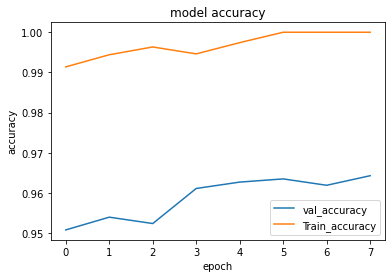

In [43]:
plot_accuracy(history_fine_tune)

In [44]:
def plot_loss(history):
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'train_loss'], loc = 'best')
    plt.show()

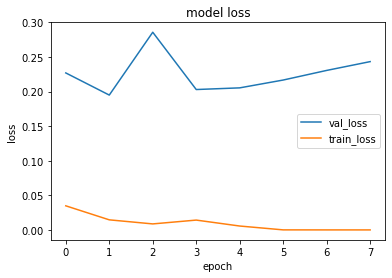

In [45]:
plot_loss(history_fine_tune)

In [46]:
# model.evaluate(X_test[:100],y_test[:100])